In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
np.set_printoptions(suppress= True)

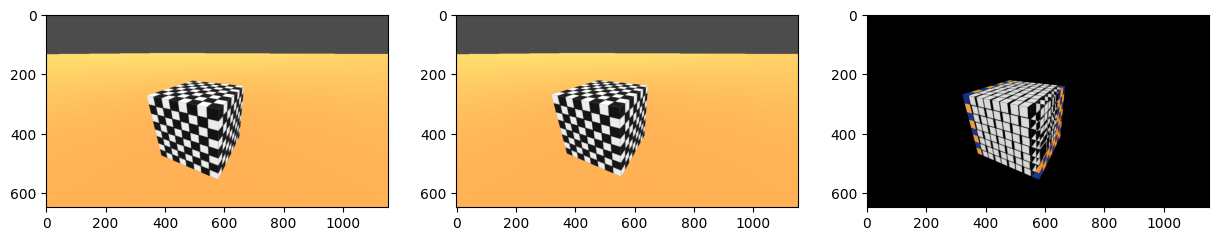

In [2]:
img1_path = "Images/img1_1.45m.png"
img2_path = "Images/img2_1.55m.png"

img1 = cv2.cvtColor(cv2.imread(img1_path), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(img2_path), cv2.COLOR_BGR2RGB)

diff = cv2.absdiff(img1, img2)

figure, axis = plt.subplots(1, 3, figsize=(15, 5)) 
  
axis[0].imshow(img1)
axis[1].imshow(img2)
axis[2].imshow(diff)

plt.imshow(diff)
plt.show() 


## Coordinates of all Objects

### Cube

Size
X: 1m Y: 1m Z: 1m

Position 
X: 0.5m Y: 0.5m Z: 0.5m

Rotation
X: 0 Y: 0 Z: 0

### Camera1

FOV
75

Position 
X: 1.45m Y: 1.5m Z: 2m

Rotation
X: -25 Y: 25 Z: 0

### Camera2

FOV
75

Position 
X: 1.55m Y: 1.5m Z: 2m

Rotation
X: -25 Y: 25 Z: 0


# Calibrating Cameras

Let our Point be Xw = (1, 1, 1) in WCF

(Coordinate Transformation)

To find Xc = (xc, yc, zc) in Camera Coordinate Frame

(Perspective Projection)

To find Xi = (xi, yi) in Image Coordinates 

Let our point on the 3d object be Xw = (0.5, 0.5, 1)
The pixel coordinates are u,v = (461, 416)

In [3]:

# Metres, Pixels
correspondence = [
    [[0.05, 0.05, 0.1, 1],[461, 416, 1]],
    [[0.05, 0.1, 0.05, 1],[523, 255, 1]],
    [[0.1, 0.05, 0.05, 1],[628, 383, 1]],
    [[0.1, 0.1, 0.1, 1],[580, 320, 1]],
    [[0.1, 0.1, 0, 1],[664, 244, 1]],
    [[0.1, 0, 0.1, 1],[580, 555, 1]],
    [[0.1, 0, 0, 1],[652, 410, 1]],
    [[0, 0.1, 0.1, 1],[340, 274, 1]],
    [[0, 0.1, 0, 1],[494, 224, 1]],
    [[0, 0, 0.1, 1],[388, 474, 1]],
]

# # Centimetres, Pixels
# correspondence = [
#     [[50, 50, 100, 1],[461, 416, 1]],
#     [[50, 100, 50, 1],[523, 255, 1]],
#     [[100, 50, 50, 1],[628, 383, 1]],
#     [[100, 100, 100, 1],[580, 320, 1]],
#     [[100, 100, 0, 1],[664, 244, 1]],
#     [[100, 0, 100, 1],[580, 555, 1]],
#     [[100, 0, 0, 1],[652, 410, 1]],
#     [[0, 100, 100, 1],[340, 274, 1]],
#     [[0, 100, 0, 1],[494, 224, 1]],
#     [[0, 0, 100, 1],[388, 474, 1]],
# ]

In [12]:
fx, fy, ox, oy = 421.32885986429943, 421.18511044972064, 576.2308099361331, 323.80923868478413

xw = np.array([0, 1, 1])
cw = np.array([0.5, 0.5, 2])

xc = (xw-cw)

print(xc)


[-0.5  0.5 -1. ]


In [13]:
u = (fx*(xc[0]/xc[2])) + ox
v = (fy*(xc[1]/xc[2])) + oy

In [14]:
print(u, v)

786.8952398682828 113.21668345992381
